# Play store apps | kaggle.com dataset

This project give us a quick glance about the most relevant apps by installs, we explore the category and the price distribution, and take a look for the most installed apps on finance and productivity.

# Gathering data:
This dataset can be found by clicking [link](https://www.kaggle.com/lava18/google-play-store-apps)

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

sns.set()

# Data pre-processing

In [215]:
apps = pd.read_csv('apps/googleplaystore.csv')

In [216]:
apps.shape

(10841, 13)

In [217]:
apps.sample(30)
# A quick sample show us that the last 3 columns don't add so much information

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9416,Code on the egg,TOOLS,3.9,146,784k,"10,000+",Free,0,Everyone,Tools,"April 10, 2017",1.15,2.2 and up
44,Popsicle Sticks and Similar DIY Craft Ideas,ART_AND_DESIGN,4.2,26,12M,"10,000+",Free,0,Everyone,Art & Design,"January 3, 2018",1.0.0,4.1 and up
8838,DS-20000S,PRODUCTIVITY,1.8,12,14M,"1,000+",Free,0,Everyone,Productivity,"August 3, 2018",1.2.2,4.1 and up
2618,"ooVoo Video Calls, Messaging & Stories",SOCIAL,4.3,1157003,34M,"50,000,000+",Free,0,Everyone,Social,"October 16, 2017",4.2.1,4.3 and up
7740,Gunship Modern Combat 3D,GAME,4.2,3247,26M,"500,000+",Free,0,Teen,Action,"July 25, 2017",1.05,2.3 and up
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50+,Free,0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up
7853,Smokes Guide for CS:GO,FAMILY,4.3,445,29M,"50,000+",Free,0,Everyone,Entertainment,"June 1, 2017",3.0,4.0 and up
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
10699,FO BOULANGER,FINANCE,NaN,10,19M,50+,Free,0,Everyone,Finance,"May 15, 2018",1.0,4.4 and up
2536,Nemours CareConnect,MEDICAL,4.4,65,37M,"10,000+",Free,0,Everyone,Medical,"April 5, 2018",10.4.1.000_00,4.0.3 and up


### Removing not relevant columns and characters

In [218]:
apps.drop(columns = ['Last Updated', 'Current Ver', 'Android Ver'], inplace=True) #Removing not relevant columns
apps.drop(columns = 'Content Rating', inplace=True)
apps.drop(columns='Size', inplace=True)
apps.drop(columns='Genres', inplace=True) #Repated with Category

apps.isna().sum() # Looking for NAs
apps.dropna(axis=0, how='any', inplace=True) # Dropping NAs rows 

apps.dtypes # Let's see what columns we have to change type

# Reviews, installs and price are our target, Reviews and installs to int, price to float

#Reviews
apps['Reviews'] = apps['Reviews'].replace('.0M', '000000', regex=True) #Replacing the M of millions
apps['Reviews'].astype(int) 

# Installs, we had to remove some simbols
apps['Installs'] = apps['Installs'].replace('[+]', '', regex=True)
apps['Installs'] = apps['Installs'].replace(r'[,]', '', regex=True)
apps['Installs'] = apps['Installs'].replace(r'Free', '0', regex=True)
apps['Installs']= apps['Installs'].astype(int) #Oh yeah

# Price
apps['Price'] = apps['Price'].replace(r'[$]','', regex=True)
apps['Price'] = apps['Price'].replace('Everyone','0.0', regex=True)
apps['Price'] = apps['Price'].astype(float)

# Dropping duplicates
apps = apps.drop_duplicates(subset='App')


# Data analysis
## Let's ask some questions to this dataset
### 1. [Which are the 30 most installed apps?](#Most-installed-apps)
### 2. [30 Most installed productivity apps](#Most-installed-productivity-apps)
### 3. [30 Most installed finance apps](#Most-installed-finance-apps)
### 4. [What is the category distribution?](#Category-distribution)
### 5. [What is the distribution of prices?](#Price-distribution)

# Most installed apps
###### [Return](#Data-analysis)

In [219]:
apps.sort_values(by='Installs', ascending=False, inplace=True) # Sorting by installs
ind = np.arange(1,apps.shape[0]+1) # I want a fancy index 
apps.set_index(ind, drop=True, inplace=True)# Reseting index to an ordered one from 1 to 30
apps.head(30)

,App,Category,Rating,Reviews,Installs,Type,Price
1,Google News,NEWS_AND_MAGAZINES,3.9,877635,1000000000,Free,0.0
2,Google,TOOLS,4.4,8033493,1000000000,Free,0.0
3,Facebook,SOCIAL,4.1,78158306,1000000000,Free,0.0
4,Instagram,SOCIAL,4.5,66577313,1000000000,Free,0.0
5,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,1000000000,Free,0.0
6,WhatsApp Messenger,COMMUNICATION,4.4,69119316,1000000000,Free,0.0
7,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,1000000000,Free,0.0
8,Gmail,COMMUNICATION,4.3,4604324,1000000000,Free,0.0
9,Google+,SOCIAL,4.2,4831125,1000000000,Free,0.0
10,Hangouts,COMMUNICATION,4.0,3419249,1000000000,Free,0.0


## Most installed productivity apps
###### [Return](#Data-analysis)

In [335]:
prod_mask = apps['Category'] == 'PRODUCTIVITY' #Building the boolean mask
prod_apps = apps[prod_mask] # Filtering
prod_apps.sort_values(by='Installs', ascending=False) #Sorting by installs
ind = np.arange(1,prod_apps.shape[0]+1) # I want a fancy index 
prod_apps.set_index(ind, drop=True, inplace=True) # Reseting the index to an ordered one from 1 to 30

prod_apps.head(30)

,App,Category,Rating,Reviews,Installs,Type,Price
1,Google Drive,PRODUCTIVITY,4.4,2731171,1000000000,Free,0.0
2,Cloud Print,PRODUCTIVITY,4.1,282460,500000000,Free,0.0
3,Microsoft Word,PRODUCTIVITY,4.5,2084126,500000000,Free,0.0
4,Dropbox,PRODUCTIVITY,4.4,1861310,500000000,Free,0.0
5,Google Calendar,PRODUCTIVITY,4.2,858208,500000000,Free,0.0
6,CamScanner - Phone PDF Creator,PRODUCTIVITY,4.6,1502622,100000000,Free,0.0
7,Google Docs,PRODUCTIVITY,4.3,815981,100000000,Free,0.0
8,ES File Explorer File Manager,PRODUCTIVITY,4.6,5383985,100000000,Free,0.0
9,Google Keep,PRODUCTIVITY,4.4,691474,100000000,Free,0.0
10,Microsoft OneNote,PRODUCTIVITY,4.4,480643,100000000,Free,0.0


# Most installed finance apps
###### [Return](#Data-analysis)

In [336]:
mask = apps['Category'] == 'FINANCE' # Boolean mask
apps_fin = apps[mask] # Filtering

apps_fin.sort_values(by='Installs', ascending=False)# Sorting
ind = np.arange(1, apps_fin.shape[0]+1) # New index
apps_fin.set_index(ind, drop=True, inplace=True)# Setting the new index


apps_fin.head(30)

,App,Category,Rating,Reviews,Installs,Type,Price
1,Google Pay,FINANCE,4.2,347838,100000000,Free,0.0
2,PayPal,FINANCE,4.3,659741,50000000,Free,0.0
3,HDFC Bank MobileBanking,FINANCE,4.2,208463,10000000,Free,0.0
4,Chase Mobile,FINANCE,4.6,1374549,10000000,Free,0.0
5,Bank of America Mobile Banking,FINANCE,4.4,341090,10000000,Free,0.0
6,Mobile Bancomer,FINANCE,4.2,278082,10000000,Free,0.0
7,CASHIER,FINANCE,3.3,335738,10000000,Free,0.0
8,Itau bank,FINANCE,4.2,957973,10000000,Free,0.0
9,Cash App,FINANCE,4.0,34428,10000000,Free,0.0
10,Wells Fargo Mobile,FINANCE,4.4,250706,10000000,Free,0.0


# Category distribution
###### [Return](#Data-analysis)

In [338]:
y_1 = apps.Category.value_counts() 
x = y_1.index.values # Separating the data just for a simpler code in the plotting chunk
y = y_1.values

Text(0, 0.5, 'Category')

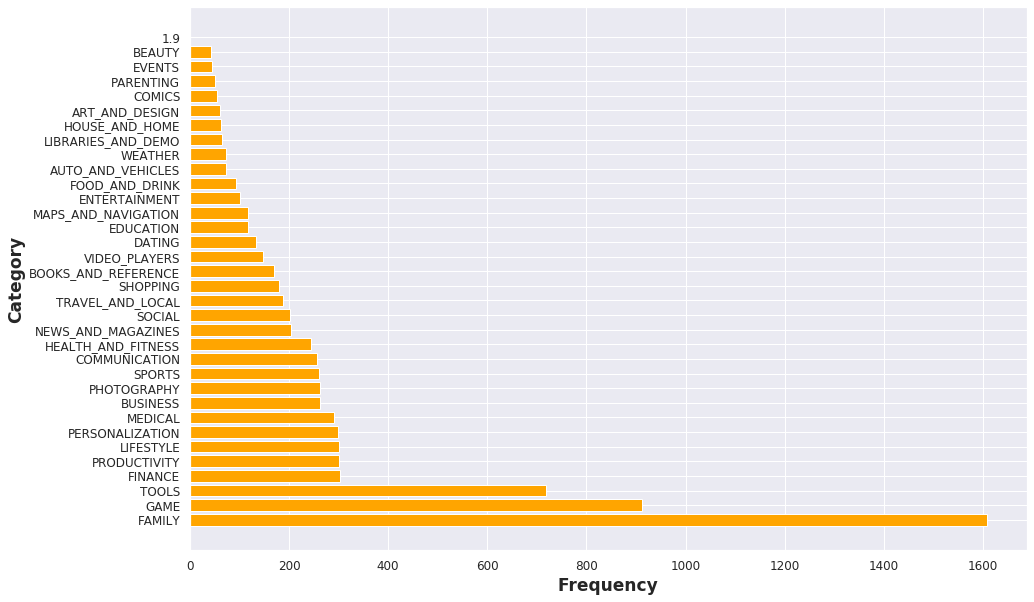

In [341]:
font_prop = mpl.font_manager.FontProperties(weight='heavy',size=17) # Configuring the labels x and y

plt.barh(x, y, color='orange') # Plotting an horizontal bar plot
plt.rcParams['figure.figsize'] = (15, 10) # Bigger figure please
plt.xlabel('Frequency', fontproperties=font_prop) # Labeling the axis
plt.ylabel('Category', fontproperties=font_prop)

### Tools, game and family are ridiculously popular, but a quick glance to Family show us that Family category is strongly filled with game apps

In [232]:
apps_family = apps.Category == 'FAMILY'
apps_family = apps[apps_family]
apps_family.sort_values(by=['Installs','Reviews'], ascending=False).head(20)

,App,Category,Rating,Reviews,Installs,Type,Price
145,Talking Tom Cat 2,FAMILY,4.3,3213548,100000000,Free,0.0
183,Bubble Witch 2 Saga,FAMILY,4.3,2838064,100000000,Free,0.0
222,Bitmoji – Your Personal Emoji,FAMILY,4.6,2312084,100000000,Free,0.0
55,Talking Tom Cat,FAMILY,4.3,1838090,100000000,Free,0.0
136,Talking Ginger,FAMILY,4.2,1752017,100000000,Free,0.0
99,Where's My Water? Free,FAMILY,4.4,1372013,100000000,Free,0.0
79,Talking Tom & Ben News,FAMILY,4.4,1131937,100000000,Free,0.0
64,Tom Loves Angela,FAMILY,4.1,1111915,100000000,Free,0.0
161,Hay Day,FAMILY,4.5,10053186,100000000,Free,0.0
266,Mobile Strike,FAMILY,3.9,903392,50000000,Free,0.0


# Price distribution
###### [Return](#Data-analysis)

In [343]:
price = apps['Price'].value_counts() # Counting how many times a price repeats
price = pd.DataFrame(price) # I had a weird error solved with reconverting price to a dataframe
price = price.sort_index(ascending=True) # Sorting the index
price.sort_values(by='Price', ascending=False)# First we check for outliers

,Price
0.00,7593
2.99,109
0.99,104
4.99,68
1.99,59
...,...
4.29,1
4.59,1
4.60,1
4.77,1


## The most popular price is clearly  0.00  with 7593 apps

## There are some outliers related to bussiness and finance areas, the value of those apps is simply selling a luxury app 'I am rich' is one of its popular names, the don't delivery real value.

In [244]:
price = price.drop(index=0.00) # 0.00 was ridiculously big
price_no_outliers = price.drop(index=[299.99,379.99,389.99,399.99,400.00, 79.99]) # Delete some weirds apps
pno = price_no_outliers
price_no_outliers = price_no_outliers.sort_index()
price_no_outliers.shape

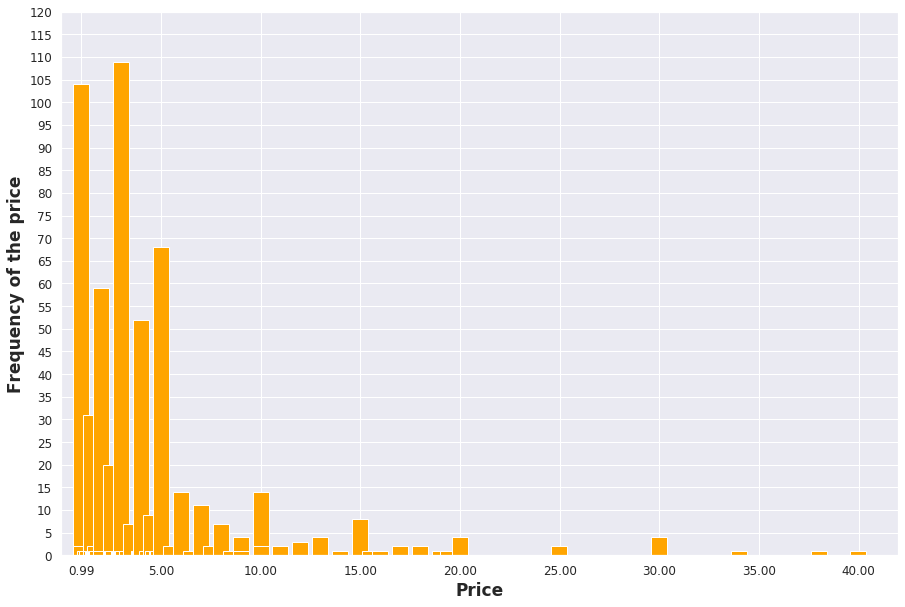

In [348]:
font_prop = mpl.font_manager.FontProperties(weight='heavy',size=17) # Configuring the labels x and y
x = pno.index.values 
y = pno.Price.values

plt.bar(x,y, color='orange')
plt.xlabel('Price', fontproperties=font_prop)
plt.ylabel('Frequency of the price', fontproperties=font_prop)

plt.yticks(np.arange(0, 125, 5)) # Configuring tick limits
plt.xticks([0.99,5.0,10.0,15.0,20.0,25.0,30.0,35.0,40.0])

plt.ylim([0, 120])
plt.xlim([0, 42])

mpl.rc('xtick', labelsize=12)# Bigger fontsize for the ticks
mpl.rc('ytick', labelsize=12)

## Here we can conclude that there is a high proportion of prices between 0.99 and 5.00 dollars.

In [334]:
proportion = price_no_outliers[price_no_outliers.index <= 5.00]
prop = proportion.Price.sum()
n = price_no_outliers.Price.sum()
final_prop = prop/n
final_prop

0.8316326530612245

## 83% of the prices are between 0.99 and 5.00